In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import modules

Let us import all the basic modules we will be needing for this project.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

- pandas - used to perform data manipulation and analysis

- numpy - used to perform a wide variety of mathematical operations on arrays

- matplotlib - used for data visualization and graphical plotting

- seaborn - built on top of matplotlib with similar functionalities

- %matplotlib - to enable the inline plotting.

- warnings - to manipulate warnings details

- filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

# Load the Dataset

We will use Kaggle to load the data set.

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- We will convert the string values into integers later.

# Exploratory Data Analysis

## Let us explore the categorical columns.

<Axes: xlabel='Survived', ylabel='count'>

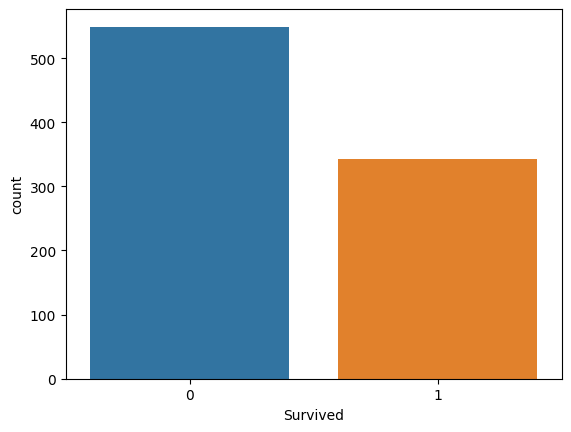

In [6]:
## categorical attributes
sns.countplot(x = train['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

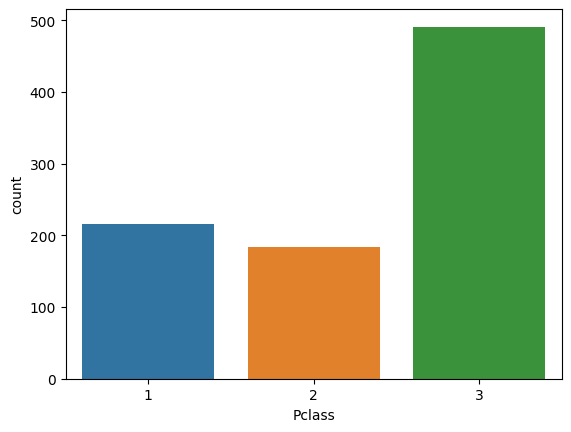

In [7]:
sns.countplot(x = train['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

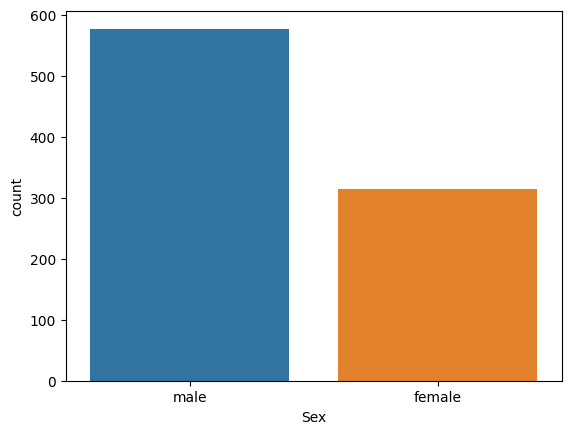

In [8]:
sns.countplot(x = train['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

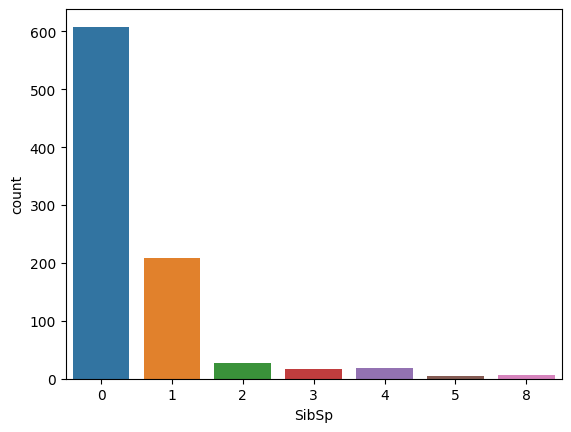

In [9]:
sns.countplot(x = train['SibSp'])

- 0 indicates that the passenger is travelling solo.

<Axes: xlabel='Parch', ylabel='count'>

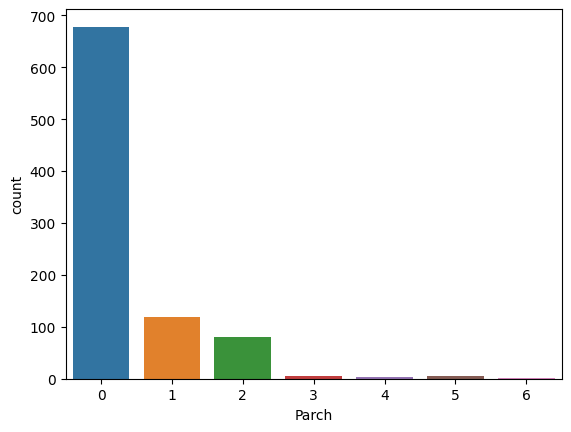

In [10]:
sns.countplot(x = train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

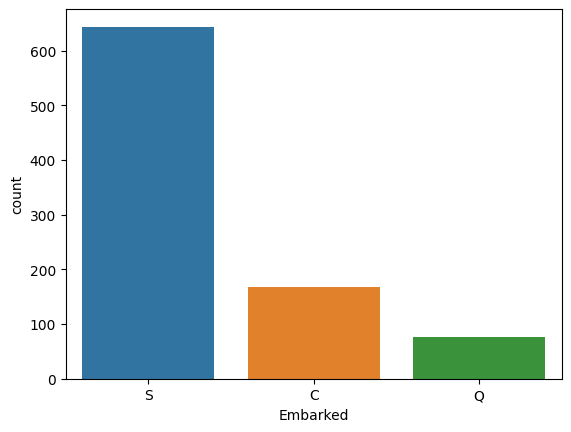

In [11]:
sns.countplot(x = train['Embarked'])

- Embarked contains the boarding port/cities of passengers.

- There are three cities with S having the more number of values.

## Let us explore the numerical columns.

<Axes: ylabel='Density'>

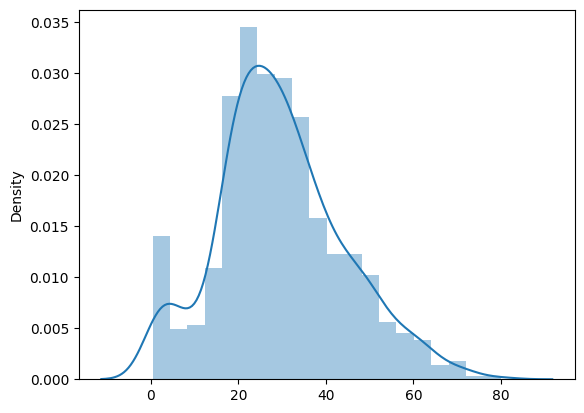

In [12]:
## numerical attributes
sns.distplot(x = train['Age'])

- The graph shows a bell curve indicating a normal distribution.

<Axes: ylabel='Density'>

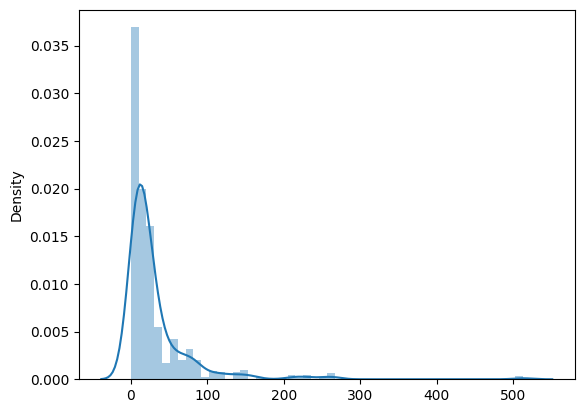

In [13]:
sns.distplot(x = train['Fare'])

- We need to do preprocessing these data to convert the right-skewed curve into a normal distribution.

## Let us compare ticket classes by creating a new graph using a pivot table.

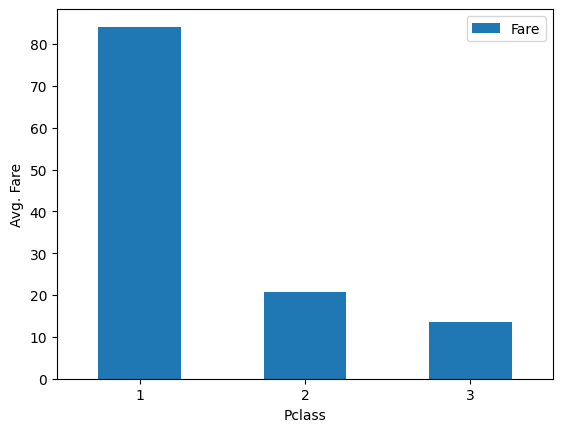

In [14]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

- It will help us to make an assumption on fares and the ticket class.

## Let's compare Pclass by creating a new graph using a pivot table.

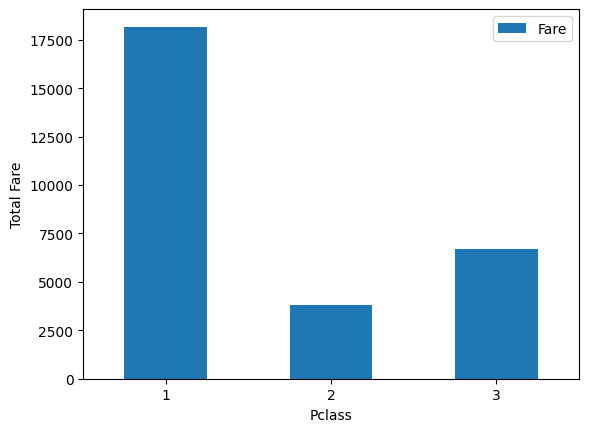

In [15]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

- All these visualizations help in understanding the variation of the dataset depending on the attributes.

## Let us display the difference between 'Pclass' and 'Survived' with the help of a barplot.

<Axes: xlabel='Pclass', ylabel='Fare'>

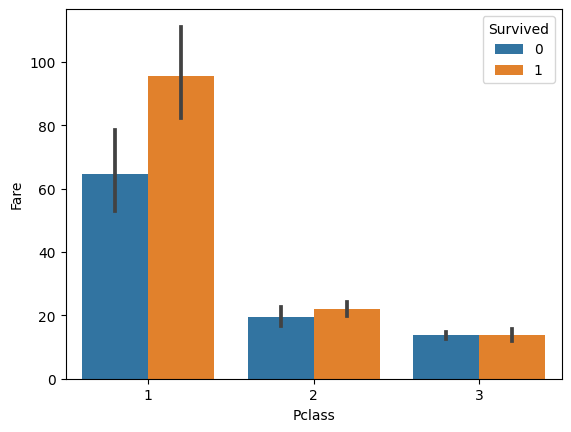

In [16]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

- This plot has a comparison of survived passengers depending on the ticket fare and passenger class.

## Let's change the horizontal and vertical axis of the graph.

<Axes: xlabel='Survived', ylabel='Fare'>

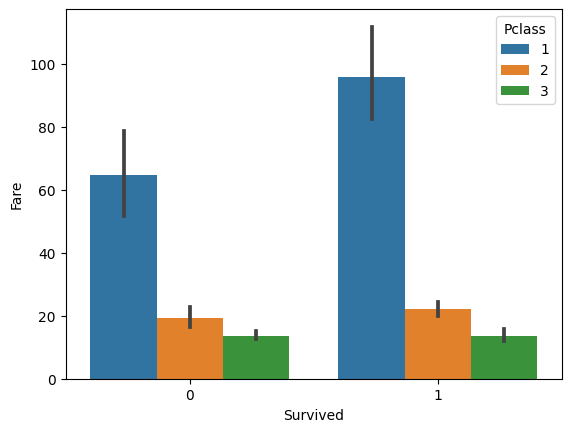

In [17]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

- Similar to the previous graph, it shows the comparison of survived passengers. 

<Axes: xlabel='Survived', ylabel='Age'>

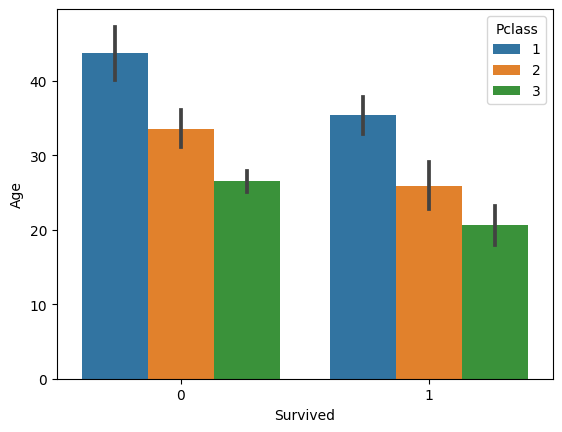

In [18]:
sns.barplot(data=train, x='Survived', y='Age', hue='Pclass')

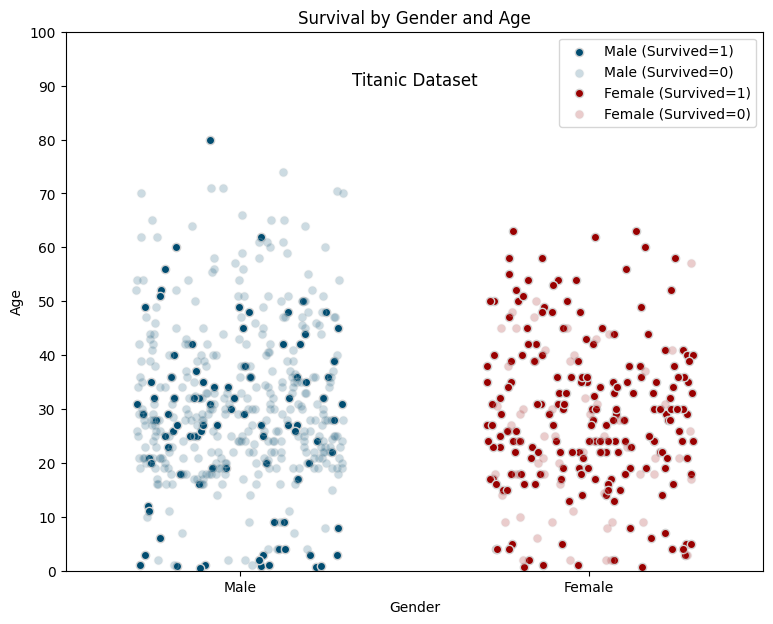

In [19]:
# Filter data for males and females
male_data = train[train['Sex'] == 'male']
female_data = train[train['Sex'] == 'female']

# Filter data for survived and not survived
male_pos = male_data[male_data['Survived'] == 1]['Age'].dropna()
male_neg = male_data[male_data['Survived'] == 0]['Age'].dropna()
female_pos = female_data[female_data['Survived'] == 1]['Age'].dropna()
female_neg = female_data[female_data['Survived'] == 0]['Age'].dropna()

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male (Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male (Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female (Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female (Survived=0)')

# Set x-axis limits
ax.set_xlim(-0.5, 1.5)

# Set y-axis limits
ax.set_ylim(0, 100)

# Set x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])

# Set y-axis ticks
ax.set_yticks(range(0, 101, 10))

# Add legend
ax.legend()

# Set plot titles
ax.set_title('Survival by Gender and Age')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')

# Add text annotation
ax.text(0.5, 90, 'Titanic Dataset', fontsize=12, ha='center')

plt.show()


- This code will create a strip plot showing the distribution of ages for male and female passengers, with survived and not survived groups distinguished by different markers and colors. 

# Data Preprocessing

We now combine the train and test datasets.

In [20]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- train_len is for the length of train data.

- axis=0 means it will concatenate in respect of row.

- axis=1 means it will concatenate in respect of columns.

- df.head() displays the first five rows from the data frame.

### Finding Null Values

In [21]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- Survived attributes NULL values are for the test data. Hence, we can avoid its NULL values.

- Since the cabin has more than a thousand NULL values, we need to drop the column.

- We will fill the missing values for other columns that show null values using the mean.

### Let us remove column 'Cabin'.

In [22]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


### We will use the mean values to fill the missing values for 'Age' and 'Fare'.


In [23]:
# mean value of "Age"
df['Age'].mean()

29.881137667304014

In [24]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

### The mean value of column 'Embarked'

In [25]:
df['Embarked'].mode()[0]

'S'

- The mode values return an dataframe, so we will use subscript to get the value. 



In [26]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

- We use mode to fill the missing values of the categorial column.



## Log transformation for Normal data distribution

 ### We have to normalize the column 'Fare'

<Axes: xlabel='Fare', ylabel='Density'>

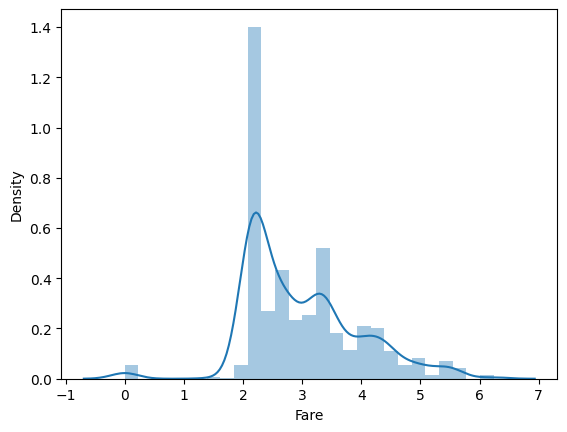

In [27]:
df['Fare'] = np.log(df['Fare']+1)

sns.distplot(df['Fare'])

- If the 'fare' has a '0' value then it will result in an error.

- To resolve this issue we have to add +1 in log transformation.


## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have a high correlation, we can neglect one variable from those two.



<Axes: >

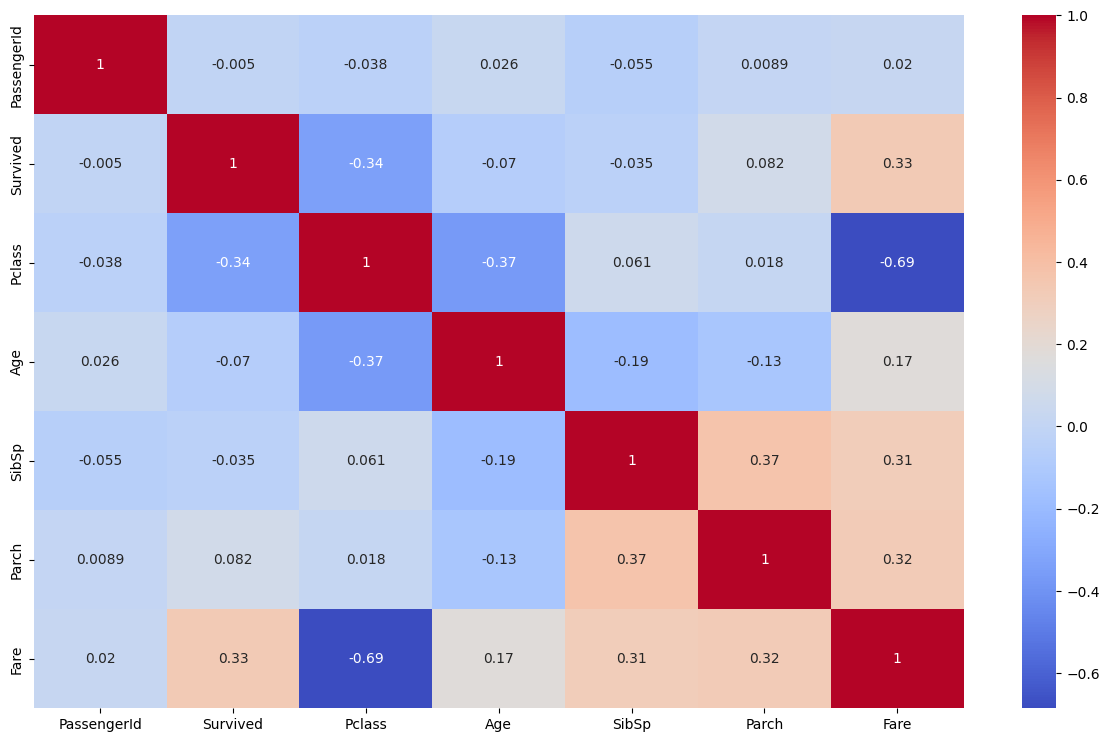

In [28]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numerical_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

- The 'Fare' shows a negative correlation with Pclass.

- Additionally, Fare has some level of correlation with all classes. Hence, the Fare column is an essential attribute for this project.

## Dropping Unnecessary Columns

In [29]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

Label Encoding refers to converting the labels into the numeric form and converting them into the machine-readable form. We will convert the column 'Sex' and 'Embarked'.



In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


- In column 'Sex', the male is converted to '1' and the female is converted to '0'.

- Likewise in 'Embarked' the cities are assigned some defined number.



## Train-Test Split

Let's split the dataset for train and test data.

In [31]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [32]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [33]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training

Now the preprocessing has been done, let's perform the model training and testing.

If you train and test the dataset completely, the results will be inaccurate. Hence, we will use 'train_test_split'.

We will add random_state with the attribute 42 to get the same split upon re-running.

If you don't specify a random state, it will randomly split the data upon re-running giving inconsistent results.

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

- X contains input attributes and y contains the output attribute.

- We use cross val score() for better validation of the model.

- Here, cv=5 means that the cross-validation will split the data into 5 parts.

- np.abs() will convert the negative score to positive and np.mean() will give the average value of 5 scores.

- Let's train our data with different models.

## Logistic Regression:

In [35]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


## Decision Tree:

In [36]:
# Decision Tree:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7219730941704036
CV Score: 0.769945389492185


## Random Forest:

In [37]:
# Random Forest:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.811493314920595


## Extra Trees:


In [38]:
# Extra Trees:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.7991212102190699


## XGBoost:



In [39]:
# XGBoost:

from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


## LightGBM:

In [40]:
# LightGBM:

from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## CatBoost:


In [41]:
# CatBoost:

from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


- Among all the models, LightGBM shows the highest CV score.

### Complete Model Training with Full Train Data

Before submitting our model, we have to train it with the full data.

In [42]:
model = LGBMClassifier()
model.fit(X, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [43]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


We will check the prediction result in the next process.

In [44]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

- The predicted data will be in the form of an array.

- The predicted values will be in float format.

- We have to create a new data frame to store this predicted data.

# Test Submission

In the last step of the project, we will use the submission template to submit our predicted results. We have to submit the predicted data in PassengerId and Survived column.

In [45]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


- The predicted values are in the float format.

- Let's change it into integers before submitting the data.

In [47]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [48]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [49]:
sub.to_csv("submission.csv", index = False)

- index=false will drop the index and save the two columns.

## Thank You for Visiting!

Thank you so much for taking the time to visit my Kaggle notebook! I hope you found the analysis informative and helpful. Your interest and support mean a lot to me.

If you have any questions, suggestions, or feedback, please feel free to leave a comment or reach out to me. Your input is invaluable in helping me improve and grow as a data scientist.

Once again, thank you for stopping by! Wishing you all the best in your data science journey.

Best regards,  
Akanksha